In [1]:
##module to get timeseries of the regional average of a variable

In [ ]:
import modules as md 
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import s3fs
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

## Chlorophyll trends


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Text(0, 0.5, 'Chlorophyll mass concentration (Kg/$m^-3$)')

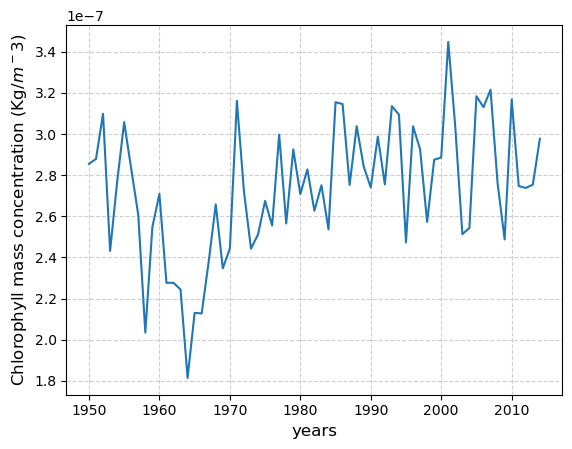

In [2]:
min_lat= 65.9
max_lat= 81.9
min_lon= 16.6
max_lon= 68.6
var='chlos'
cel_type='areacello'
model= 'NorESM2-LM'

files_dir='/escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_historical_r1i1p1f1_gn*.nc'

inp_dms=[files_dir,model,min_lat,max_lat,min_lon,max_lon,var,cel_type]

BSDMS=md.regional_average(inp_dms)

BSDMS.plot(x='year')
plt.title('')
plt.grid('True',alpha=0.6,linestyle='--')
plt.xlabel('years',fontsize=12)
plt.ylabel('Chlorophyll mass concentration (Kg/$m^-3$)',fontsize=12)


## timeseries of DMS at Surface


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Text(0, 0.5, 'DMS at Ocean Surface')

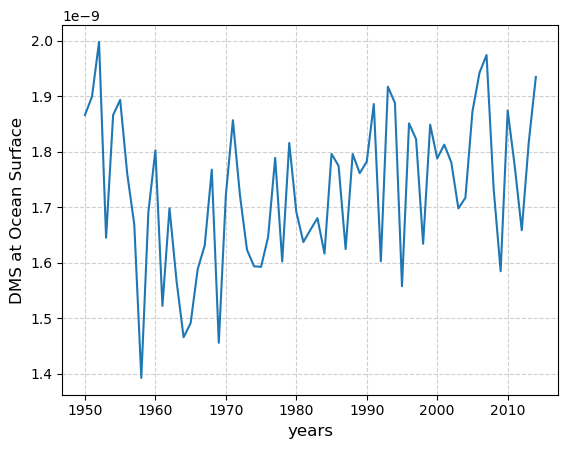

In [8]:
min_lat= 65.9
max_lat= 81.9
min_lon= 16.6
max_lon= 68.6
var='dmsos'
cel_type='areacello'
model= 'NorESM2-LM'

files_dir='/escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_historical_r1i1p1f1_gn*.nc'

inp_dms=[files_dir,model,min_lat,max_lat,min_lon,max_lon,var,cel_type]

BSDMS=md.regional_average(inp_dms)

BSDMS.plot(x='year')
plt.title('')
plt.grid('True',alpha=0.6,linestyle='--')
plt.xlabel('years',fontsize=12)
plt.ylabel('DMS at Ocean Surface',fontsize=12)
#plt.savefig('plots/DMS_at_surface_timeseries.png',dpi=500)

## Sea ice and sea surface temperature

In [ ]:
min_lat= 65.9
max_lat= 81.9
min_lon= 16.6
max_lon= 68.6
var_ice='siconc'
var_temp='tos'
cel_type='areacello'
model= 'NorESM2-LM'

files_dir='/escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_historical_r1i1p1f1_gn*.nc'
tos_dir='/escience2022/Ada/monthly/tos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'

inp_ice=[files_dir,model,min_lat,max_lat,min_lon,max_lon,var_ice,cel_type]
inp_tos= [tos_dir,model,min_lat,max_lat,min_lon,max_lon,var_temp,cel_type]

BSice=md.regional_average(inp_ice)
BStos=md.regional_average(inp_tos)

fig=plt.figure()
ax=fig.add_subplot()

BSice.plot(x='year',ax=ax,color='tab:blue',label='Sea Ice')
ax1= ax.twinx()
BStos.plot(x='year',ax=ax1,color='tab:orange',label='SST')

plt.title('')
plt.grid('True',alpha=0.6,linestyle='--')
plt.xlabel('years',fontsize=12)
ax.set_ylabel('Sea Ice ',fontsize=12)
ax1.set_ylabel('Sea surface temperature ($^\circ$C)',fontsize=12)
ax.legend(fontsize=10,loc=(0.4,0.9))
ax1.legend(fontsize=10,loc=(0.4,0.8))
plt.savefig('plots/sea_ice_temperature_timeseries.png',dpi=500)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


## Yearly Anomaly plots 

##  Chlorophyll

In [2]:
var='chlos'
anm1=md.anomaly(var)[0]
anm1

<xarray.DataArray (j: 385, i: 360)>
dask.array<sub, shape=(385, 360), dtype=float64, chunksize=(385, 360), chunktype=numpy.ndarray>
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 378 379 380 381 382 383 384 385
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
    longitude  (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    latitude   (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


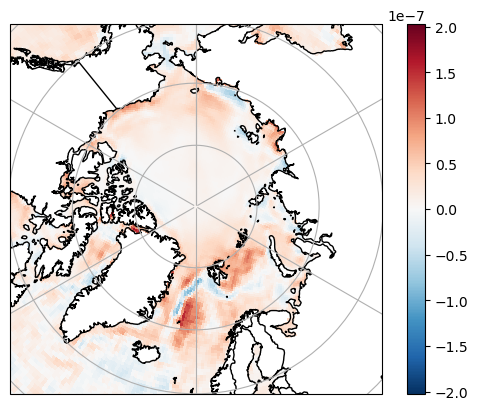

In [3]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
#ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
#'viridis',Greens,winter

anm1.plot(ax=ax1, transform=ccrs.PlateCarree(), x='longitude', y='latitude')

#cc=ax1.pcol(anm1.longitude,anm1.latitude,anm1,transform=ccrs.PlateCarree())


## DMSOS

In [4]:
var='dmsos'
anm1=md.anomaly(var)[0]
anm1

<xarray.DataArray (j: 385, i: 360)>
dask.array<sub, shape=(385, 360), dtype=float64, chunksize=(385, 360), chunktype=numpy.ndarray>
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 378 379 380 381 382 383 384 385
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
    longitude  (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    latitude   (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


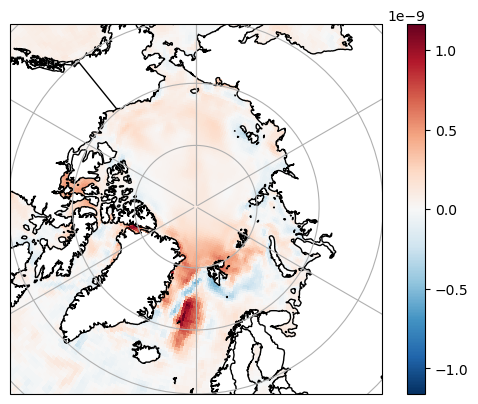

In [5]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
#ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
#'viridis',Greens,winter

anm1.plot(ax=ax1, transform=ccrs.PlateCarree(), x='longitude', y='latitude')

## Sea Ice

In [6]:
var='siconc'
anm1=md.anomaly(var)[0]

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


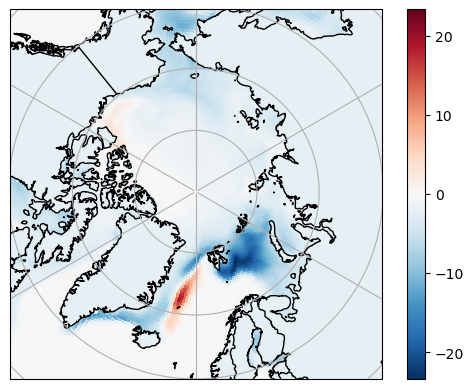

In [7]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
#ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
#'viridis',Greens,winter
#percentage change
anm1.plot(ax=ax1, transform=ccrs.PlateCarree(), x='longitude', y='latitude')

## Seasonal mean

In [2]:
anm=md.weighted_seasonal_mean('chlos')
anm

<xarray.Dataset>
Dimensions:    (j: 385, i: 360, season: 4)
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 378 379 380 381 382 383 384 385
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
    longitude  (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    latitude   (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    chlos      (season, j, i) float64 dask.array<chunksize=(1, 385, 360), meta=np.ndarray>

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


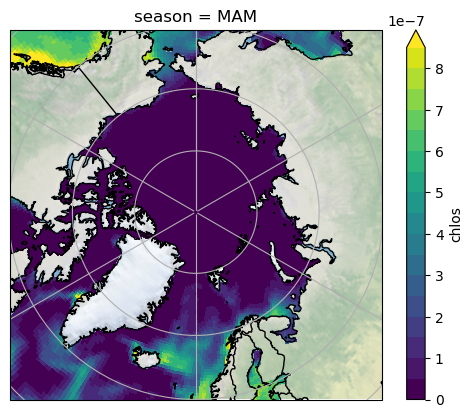

In [3]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
anm.chlos.sel(season='MAM').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), levels = np.arange(0,.9e-6,.5e-7))


## Seasonal Anomaly

## MAM anomaly

def anomaly (var):
    
    ## Put the variable name as stored in the NorESM data. This function will output the anomaly and anomaly/climatology in a list.
    #anaomaly is calculated as follows:
         #climatology is calculated usng data from 1950 to 1979
         #Present day trend is calculated for data from 1980 to 2014
    s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))


    if var == 'chlos':
        file_dir ='s3://escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var=='dmsos':
        file_dir ='s3://escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var=='emidms':
        file_dir ='s3://escience2022/Ada/monthly/emidms_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var == 'siconc':
        file_dir='s3://escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var == 'tos':
        file_dir='s3://escience2022/Ada/monthly/tos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
        
    remote_files = s3.glob(file_dir)
    x=remote_files[10:]
    fileset = [s3.open(file) for file in remote_files[10:]]

    da = xr.open_mfdataset(fileset, combine='by_coords')
    weight= weighted_temporal_mean(da,var)
    
    aa=weight#.groupby("time.year").sum(dim='time')

    now1=aa.isel(year = slice(30,None))  #remove first 30 years
    now=now1.mean('year')

    clim1= aa.isel(year = slice(None,30))  #remove last 30 years
    clim=clim1.mean('year')

    fractional_anm=(now-clim)/clim
    anm= (now-clim)
    
    anomaly=[anm,fractional_anm]
    return anomaly


## Trends

In [25]:
def anomaly_seasonal(var):
    
    
    s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))

    if var == 'chlos':
        file_dir ='s3://escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var=='dmsos':
        file_dir ='s3://escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var=='emidms':
        file_dir ='s3://escience2022/Ada/monthly/emidms_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var == 'siconc':
        file_dir='s3://escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var == 'tos':
        file_dir='s3://escience2022/Ada/monthly/tos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'

    remote_files = s3.glob(file_dir)
    fileset = [s3.open(file) for file in remote_files[5:]]

    ds = xr.open_mfdataset(fileset, combine='by_coords')
    
    now=ds.sel(time=slice("1980-01-01", "2014-10-31"))
    
    ref_year=a.sel(time=slice("1950-01-01", "1979-10-31"))
    
    weighted_now= weighted_seasonal_mean(now,var)
    weighted_ref= weighted_seasonal_mean(ref_year,var)
    
    
    #aa=weight#.groupby("time.year").sum(dim='time')

    #now=now1.mean('year')

    #clim=clim1.mean('year')

    #fractional_anm=(now-clim)/clim
    #anm= (now-clim)
    
    #anomaly=[anm,fractional_anm]
    return [weighted_now,weighted_ref]

def weighted_seasonal_mean(ds,var):
      
    """
    weight by days in each month
    """
    # Determine the month length
    month_length = ds.time.dt.days_in_month

    # Calculate the weights
    wgts = month_length.groupby("time.season") / month_length.groupby("time.season").sum()

    # Make sure the weights in each year add up to 1
    np.testing.assert_allclose(wgts.groupby("time.season").sum(xr.ALL_DIMS), 1.0)

    # Subset our dataset for our variable
    obs = ds[var]

    # Setup our masking for nan values
    cond = obs.isnull()
    ones = xr.where(cond, 0, 1.0)

    # Calculate the numerator
    obs_sum = (obs * wgts).groupby("time.season").sum(dim="time")

    # Calculate the denominator
    ones_out = (ones*wgts).groupby("time.season").sum(dim="time")

    # Return the weighted average
    return (obs_sum/ ones_out).to_dataset(name = var)



In [26]:
ds_now=anomaly_seasonal('chlos')[0]
ds_ref=anomaly_seasonal('chlos')[1]

## Anomaly in spring months

In [30]:
anm=ds_now-ds_ref
anm

<xarray.Dataset>
Dimensions:    (j: 385, i: 360, season: 4)
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 378 379 380 381 382 383 384 385
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
    longitude  (j, i) float64 250.5 251.5 252.5 253.5 ... 250.1 250.1 250.0
    latitude   (j, i) float64 -80.11 -80.11 -80.11 -80.11 ... 62.59 62.35 62.11
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    chlos      (season, j, i) float64 dask.array<chunksize=(1, 385, 360), meta=np.ndarray>

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


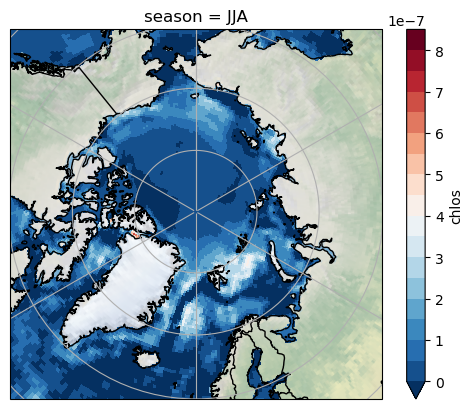

In [32]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
anm.chlos.sel(season='JJA').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), levels = np.arange(0,.9e-6,.5e-7))



In [ ]:
import pymannkendall as mk

import numpy as np

def trend(ds, variable, season):

 

    # create a dataset with same lon and lat as the precipitation dataset

    ds_trend = xr.Dataset({'lat': ds.lat,'lon': ds.lon})

    # add ds_trend_DJF to ds_NorESM2_MM_precip_season_trend

    ds_trend['mk_trend'] = (['lat', 'lon'], np.zeros(ds.lat.shape[0], ds.lon.shape[0])*np.nan)

    ds_trend['mk_intercept'] = (['lat', 'lon'], np.zeros(ds.lat.shape[0], ds.lon.shape[0])*np.nan)

    ds_trend['mk_p_val'] = (['lat', 'lon'], np.zeros(ds.lat.shape[0], ds.lon.shape[0])*np.nan)

 

    for ilat in range(ds[variable].shape[1]):

        for ilon in range(ds[variable].shape[2]):

                ts = ds[variable][:, ilat, ilon]

                results = mk.original_test(ts)

                ds_trend['mk_trend'][ilat, ilon] = results[7]

                ds_trend['mk_intercept'][ilat, ilon] = results[8]

                ds_trend['mk_p_val'][ilat, ilon] = results[2]

    return ds_trend

In [138]:
def seasonal_avg_timeseries(var):
    """Calculates timeseries over seasonal averages from timeseries of monthly means
    The weighted average considers that each month has a different number of days.
    Using 'QS-DEC' frequency will split the data into consecutive three-month periods, 
    anchored at December 1st. 
    I.e. the first value will contain only the avg value over January and February 
    and the last value only the December monthly averaged value
    
    Parameters
    ----------
    ds : xarray.DataArray i.e.  ds[var]
        
    Returns
    -------
    ds_out: xarray.DataSet with 4 timeseries (one for each season DJF, MAM, JJA, SON)
            note that if you want to include the output in an other dataset, e.g. dr,
            you should use xr.merge(), e.g.
            dr = xr.merge([dr, seasonal_avg_timeseries(dr[var], var)])
    """
    
    s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))


    if var == 'chlos':
        file_dir ='s3://escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var=='dmsos':
        file_dir ='s3://escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var=='emidms':
        file_dir ='s3://escience2022/Ada/monthly/emidms_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var == 'siconc':
        file_dir='s3://escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var == 'tos':
        file_dir='s3://escience2022/Ada/monthly/tos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
        
    remote_files = s3.glob(file_dir)
    fileset = [s3.open(file) for file in remote_files[10:]]

    ds = xr.open_mfdataset(fileset, combine='by_coords')
    
    cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
    col = intake.open_esm_datastore(cat_url)
    cat = col.search(source_id=['NorESM2-LM'], activity_id = ['CMIP'], experiment_id=['piControl'], table_id=['Ofx'], variable_id=['areacello'], member_id=['r1i1p1f1'])
    ds_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})
    areacello = ds_dict[list(ds_dict.keys())[0]]
    areacello = areacello.squeeze()
    areacello = areacello.where(areacello.latitude>60, drop = True)
    ds=ds.sel(i=areacello.i).sel(j=areacello.j)
    
    month_length = ds.time.dt.days_in_month
    sesavg = (ds * month_length).resample(time="QS-DEC").sum() / month_length.where(ds.notnull()).resample(time="QS-DEC").sum()
    
    djf=sesavg.isel(time=slice(0,None,4))
    mam=sesavg.isel(time=slice(1,None,4))
    jja=sesavg.isel(time=slice(2,None,4))
    son=sesavg.isel(time=slice(3,None,4))
    
    return [djf,mam,jja,son]

In [126]:
import pymannkendall as mk

import numpy as np

def trend(ds, variable):

    # create a dataset with same lon and lat as the precipitation dataset

    ds_trend = xr.Dataset({'j': ds.j,'i': ds.i})

    # add ds_trend_DJF to ds_NorESM2_MM_precip_season_trend

    ds_trend['mk_trend'] = (['j', 'i'], np.zeros((ds.j.shape[0], ds.i.shape[0]))*np.nan)

    ds_trend['mk_intercept'] = (['j', 'i'], np.zeros((ds.j.shape[0], ds.i.shape[0]))*np.nan)

    ds_trend['mk_p_val'] = (['j', 'i'], np.zeros((ds.j.shape[0], ds.i.shape[0]))*np.nan)

 

    for j in range(ds[variable].shape[1]):

        for i in range(ds[variable].shape[2]):

                ts = ds[variable][:, j, i]

                results = mk.original_test(ts)

                ds_trend['mk_trend'][j, i] = results[7]

                ds_trend['mk_intercept'][j, i] = results[8]

                ds_trend['mk_p_val'][j, i] = results[2]

    return ds_trend

In [139]:
ds=seasonal_avg_timeseries('chlos')[2]

#da=ds.chlos.where(ds.chlos>0,ds.chlos,np.nan).to_dataset(name='chlos')


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [140]:
ds

<xarray.Dataset>
Dimensions:             (j: 76, i: 360, time: 65, vertices: 4)
Coordinates:
  * j                   (j) int32 310 311 312 313 314 ... 381 382 383 384 385
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    longitude           (j, i) float64 dask.array<chunksize=(76, 360), meta=np.ndarray>
    member_id           <U8 'r1i1p1f1'
    latitude            (j, i) float64 dask.array<chunksize=(76, 360), meta=np.ndarray>
  * time                (time) object 1950-06-01 00:00:00 ... 2014-06-01 00:0...
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, j, i, vertices) float64 dask.array<chunksize=(10, 76, 360, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 dask.array<chunksize=(10, 76, 360, 4), meta=np.ndarray>
    chlos               (time, j, i) float64 dask.array<chunksize=(10, 76, 360), meta=np.ndarray>

In [125]:
ds.j.shape

(385,)

In [136]:
import statsmodels.formula.api as sm
import pandas as pd

dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)
da2
#da.chlos_polyfit_coefficients[0]
#formula=sm.ols(formula='chlos~time',data=data).fit()

<xarray.Dataset>
Dimensions:                                  (j: 385, i: 360, vertices: 4,
                                              degree: 2)
Coordinates:
  * j                                        (j) int32 1 2 3 4 ... 383 384 385
  * i                                        (i) int32 1 2 3 4 ... 358 359 360
  * vertices                                 (vertices) int64 0 1 2 3
  * degree                                   (degree) int64 1 0
    longitude                                (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    member_id                                <U8 'r1i1p1f1'
    latitude                                 (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
Data variables:
    vertices_latitude_polyfit_coefficients   (degree, j, i, vertices) float64 dask.array<chunksize=(2, 385, 360, 4), meta=np.ndarray>
    vertices_longitude_polyfit_coefficients  (degree, j, i, vertices) float64 dask.array<chunksize=(2, 385, 360, 4), meta=np.ndarray>
    chlos_polyfit_coefficients               (degree, j, i) float64 dask.array<chunksize=(2, 385, 360), meta=np.ndarray>

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


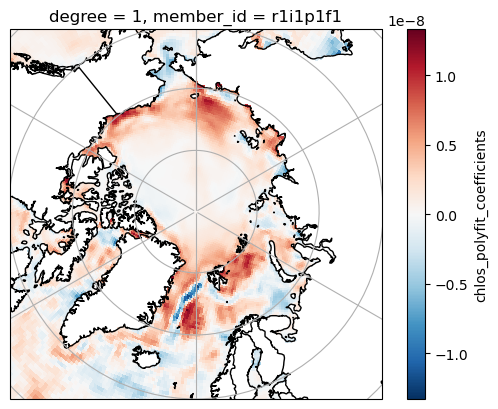

In [141]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
#ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
#'viridis',Greens,winter
#percentage change
da2.chlos_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), x='longitude', y='latitude')

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


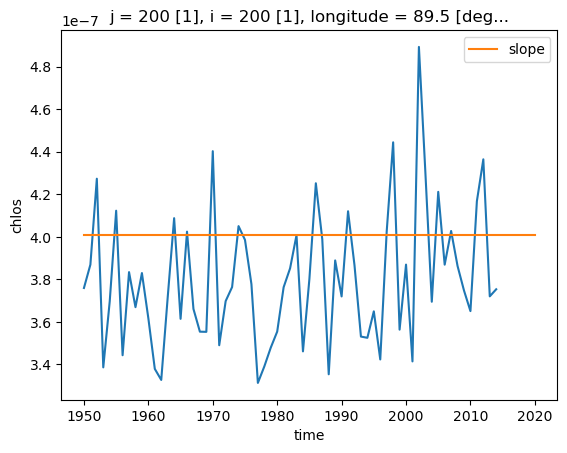

In [142]:
dss.chlos.sel(i=200,j=200).plot()

x = np.linspace(1950,2020,100)
y = 1.05001128e-26*x+4.01002161e-07

#plt.xlim((1950,2014))
plt.plot(x,y,label='slope')
plt.legend()

In [98]:
ds=md.check_data(15,'chlos')
ds

<xarray.Dataset>
Dimensions:             (time: 180, bnds: 2, j: 385, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 2000-01-16 12:00:00 ... 2014-12-16 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384 385
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 dask.array<chunksize=(120, 385, 360, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 dask.array<chunksize=(120, 385, 360, 4), meta=np.ndarray>
    chlos               (time, j, i) float32 dask.array<chunksize=(120, 385, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1600-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     430335.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               chlos
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.6.0
    tracking_id:               hdl:21.14100/f793efc1-b899-4c3f-8a63-f5feccc23423

In [74]:
np.arange(1950,1950+len(ds.time.values))

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [63]:
da.chlos_polyfit_coefficients.sel(i=200,j=200).values

array([1.05001128e-26, 4.01002161e-07])

 ## put above plots into a subplot with proper labelling variables: chlos, dmsos, tos, siconc

min_lat= 65.9
max_lat= 81.9
min_lon= 16.6
max_lon= 68.6
var1='zoocos'
var2='zooc'
cel_type='areacello'
model= 'NorESM2-LM'

files_dir1='/escience2022/Ada/monthly/zoocos_Omon_NorESM2-LM_historical_r1i1p1f1_gr*.nc'
files_dir2='/escience2022/Ada/monthly/zooc_Omon_NorESM2-LM_historical_r1i1p1f1_gr_*.nc'

inp_zoocos=[files_dir1,model,min_lat,max_lat,min_lon,max_lon,var1,cel_type]
inp_zooc=[files_dir2,model,min_lat,max_lat,min_lon,max_lon,var2,cel_type]


BSzoocos=md.regional_average(inp_zoocos)
BSzoo=md.regional_average(inp_zooc)

fig=plt.figure()
ax=fig.add_subplot()

BSzoocos.plot(x='year',ax=ax,color='tab:blue',label='Surface Zooplankton')
ax1= ax.twinx()
BSzoo.plot(x='year',ax=ax1,color='tab:orange',label='Zooplankton')

plt.title('')
plt.grid('True',alpha=0.6,linestyle='--')
plt.xlabel('years',fontsize=12)
ax.set_ylabel('Zooplankton carbon concentration',fontsize=9)
ax1.set_ylabel('Surface Zooplankton carbon concentration',fontsize=9)
ax.legend(fontsize=12,loc=(0.4,0.8))
ax1.legend(fontsize=12,loc=(0.4,0.7))
plt.savefig('plots/zooplankton_surface_and_ML.png',dpi=500)